In [182]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import os

In [183]:
# Turn off setting with copy warning
pd.set_option('mode.chained_assignment', None)

In [2]:
from notify_run import Notify

In [3]:
notify = Notify()

In [5]:
notify.register()

Endpoint: https://notify.run/hmGtR7iMgDqQW9RX
To subscribe, open: https://notify.run/c/hmGtR7iMgDqQW9RX
Or scan this QR code:

                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              

In [6]:
os.chdir('../data/interim')

In [7]:
os.listdir()

['.gitkeep',
 'data post-eda.csv',
 'joined data full.csv',
 'joined data post-markdowns.csv',
 'joined data pre-markdowns.csv']

### Generate Dummy Features

My approach is going to be dropping the markdown columns in order to have access to the entire data set for training.

In [184]:
# Loading full joined data as df
df = pd.read_csv('data post-eda.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Week
0,1,1,2010-01-10,20094.19,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1
1,1,2,2010-01-10,45829.02,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1
2,1,3,2010-01-10,9775.17,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1
3,1,4,2010-01-10,34912.45,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1
4,1,5,2010-01-10,23381.38,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1


In [185]:
# Dropping markdown columns
df.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace=True)

In [186]:
# Show info of remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  int64  
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   CPI           421570 non-null  float64
 8   Unemployment  421570 non-null  float64
 9   Type          421570 non-null  int64  
 10  Size          421570 non-null  int64  
 11  Month         421570 non-null  int64  
 12  Week          421570 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 41.8+ MB


Columns that should have dummy features encoded:
- Store
- Dept
- Type
- Month
- Week

In [187]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Month,Week
0,1,1,2010-01-10,20094.19,0,71.89,2.603,211.671989,7.838,2,151315,1,1
1,1,2,2010-01-10,45829.02,0,71.89,2.603,211.671989,7.838,2,151315,1,1
2,1,3,2010-01-10,9775.17,0,71.89,2.603,211.671989,7.838,2,151315,1,1
3,1,4,2010-01-10,34912.45,0,71.89,2.603,211.671989,7.838,2,151315,1,1
4,1,5,2010-01-10,23381.38,0,71.89,2.603,211.671989,7.838,2,151315,1,1


I plan to create 3 separate models. One for each of the different store types.

In [188]:
# Create dummy features
deptDummies = pd.get_dummies(df['Dept'], prefix='Dept', drop_first=True)
monthDummies = pd.get_dummies(df['Month'], prefix='Month', drop_first=True)
weekDummies = pd.get_dummies(df['Week'], prefix='Week', drop_first=True)

In [189]:
# Join dummy features onto dataframe
df = df.join([deptDummies, monthDummies, weekDummies])

In [190]:
# Drop original features
df.drop(columns=['Dept', 'Month', 'Week'], inplace=True)

In [191]:
# Split the data by 3 store types
df0 = df.loc[df.Type == 0]
df1 = df.loc[df.Type == 1]
df2 = df.loc[df.Type == 2]

In [192]:
# Drop Type and Date features
df0 = df0.drop(columns=['Type'])
df1 = df1.drop(columns=['Type'])
df2 = df2.drop(columns=['Type'])

In [193]:
# Create Store Dummy Features
storeDummies0 = pd.get_dummies(df0['Store'], prefix='Store', drop_first=True)
storeDummies1 = pd.get_dummies(df1['Store'], prefix='Store', drop_first=True)
storeDummies2 = pd.get_dummies(df2['Store'], prefix='Store', drop_first=True)

In [194]:
# Join Store dummes to dataframes
df0 = df0.join(storeDummies0)
df1 = df1.join(storeDummies1)
df2 = df2.join(storeDummies2)

In [195]:
# Drop Store columns from dataframes
df0 = df0.drop(columns=['Store'])
df1 = df1.drop(columns=['Store'])
df2 = df2.drop(columns=['Store'])

In [196]:
# Print dataframe shapes
print(df0.shape)
print(df1.shape)
print(df2.shape)

(42597, 155)
(163495, 166)
(215478, 171)


### Cross-Validation Train Test Split

We want to perform a train test split prior to scaling the data

In [197]:
# Create masks
trainmask0 = df0.Date < '2012-01-01'
testmask0 = df0.Date >= '2012-01-01'
trainmask1 = df1.Date < '2012-01-01'
testmask1 = df1.Date >= '2012-01-01'
trainmask2 = df2.Date < '2012-01-01'
testmask2 = df2.Date >= '2012-01-01'

# Split into sets by masks
dftrain0 = df0.loc[trainmask0]
dftest0 = df0.loc[testmask0]
dftrain1 = df1.loc[trainmask1]
dftest1 = df1.loc[testmask1]
dftrain2 = df2.loc[trainmask2]
dftest2 = df2.loc[testmask2]

Scaler transformation for continuous feature variables

In [198]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [199]:
# Initialize scaler and fit_transform X_train
scaler0 = MinMaxScaler()
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
dftrain0[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler0.fit_transform(dftrain0[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])
dftrain1[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler1.fit_transform(dftrain1[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])
dftrain2[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler2.fit_transform(dftrain2[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])

In [205]:
# Verify that tranformation was successful
dftrain0.head()

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Dept_2,Dept_3,...,Week_48,Week_49,Week_50,Week_51,Week_52,Store_37,Store_38,Store_42,Store_43,Store_44
1993,2010-01-10,9843.45,0,0.648274,0.052725,0.915722,0.253188,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1994,2010-01-10,13898.10,0,0.648274,0.052725,0.915722,0.253188,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1995,2010-01-10,755.67,0,0.648274,0.052725,0.915722,0.253188,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1996,2010-01-10,13610.70,0,0.648274,0.052725,0.915722,0.253188,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,2010-01-10,444.76,0,0.648274,0.052725,0.915722,0.253188,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
# Apply scaler transformation to test data
dftest0[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler0.transform(dftest0[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])
dftest1[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler1.transform(dftest1[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])
dftest2[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler2.transform(dftest2[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])

Split X from y

In [202]:
# Test train split
X_train0 = dftrain0.drop(columns=['Date', 'Weekly_Sales'])
y_train0 = dftrain0[['Weekly_Sales']]
X_test0 = dftest0.drop(columns=['Date', 'Weekly_Sales'])
y_test0 = dftest0[['Weekly_Sales']]
X_train1 = dftrain1.drop(columns=['Date', 'Weekly_Sales'])
y_train1 = dftrain1[['Weekly_Sales']]
X_test1 = dftest1.drop(columns=['Date', 'Weekly_Sales'])
y_test1 = dftest1[['Weekly_Sales']]
X_train2 = dftrain2.drop(columns=['Date', 'Weekly_Sales'])
y_train2 = dftrain2[['Weekly_Sales']]
X_test2 = dftest2.drop(columns=['Date', 'Weekly_Sales'])
y_test2 = dftest2[['Weekly_Sales']]

Let's define a function for splitting the training data into segments in order to perform cross-validation on models later.

In [203]:
def cvsplit(df):
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    
    # Create masks for 5-fold CV
    trainm1 = df.Date < '2011-01-01'
    testm1 = (df.Date >= '2011-01-01') & (df.Date < '2011-03-01')
    trainm2 = df.Date < '2011-03-01'
    testm2 = (df.Date >= '2011-03-01') & (df.Date < '2011-05-01')
    trainm3 = df.Date < '2011-05-01'
    testm3 = (df.Date >= '2011-05-01') & (df.Date < '2011-07-01')
    trainm4 = df.Date < '2011-07-01'
    testm4 = (df.Date >= '2011-07-01') & (df.Date < '2011-09-01')
    trainm5 = df.Date < '2011-09-01'
    testm5 = (df.Date >= '2011-09-01') & (df.Date < '2012-01-01')
    
    # Split into sets by masks
    dftrain1 = df.loc[trainm1]
    dftest1 = df.loc[testm1]    
    dftrain2 = df.loc[trainm2]
    dftest2 = df.loc[testm2]   
    dftrain3 = df.loc[trainm3]
    dftest3 = df.loc[testm3]   
    dftrain4 = df.loc[trainm4]
    dftest4 = df.loc[testm4]   
    dftrain5 = df.loc[trainm5]
    dftest5 = df.loc[testm5]
    
    # Test train split and append to lists
    X_train.append(dftrain1.drop(columns=['Date', 'Weekly_Sales']))
    y_train.append(dftrain1[['Weekly_Sales']])
    X_test.append(dftest1.drop(columns=['Date', 'Weekly_Sales']))
    y_test.append(dftest1[['Weekly_Sales']])
    
    X_train.append(dftrain2.drop(columns=['Date', 'Weekly_Sales']))
    y_train.append(dftrain2[['Weekly_Sales']])
    X_test.append(dftest2.drop(columns=['Date', 'Weekly_Sales']))
    y_test.append(dftest2[['Weekly_Sales']])
    
    X_train.append(dftrain3.drop(columns=['Date', 'Weekly_Sales']))
    y_train.append(dftrain3[['Weekly_Sales']])
    X_test.append(dftest3.drop(columns=['Date', 'Weekly_Sales']))
    y_test.append(dftest3[['Weekly_Sales']])
    
    X_train.append(dftrain4.drop(columns=['Date', 'Weekly_Sales']))
    y_train.append(dftrain4[['Weekly_Sales']])
    X_test.append(dftest4.drop(columns=['Date', 'Weekly_Sales']))
    y_test.append(dftest4[['Weekly_Sales']])
    
    X_train.append(dftrain5.drop(columns=['Date', 'Weekly_Sales']))
    y_train.append(dftrain5[['Weekly_Sales']])
    X_test.append(dftest5.drop(columns=['Date', 'Weekly_Sales']))
    y_test.append(dftest5[['Weekly_Sales']])
    
    # Return CV test train lists
    return X_train, y_train, X_test, y_test

In [204]:
# Create cross-validation sets
cvX_train0, cvy_train0, cvX_test0, cvy_test0 = cvsplit(dftrain0)
cvX_train1, cvy_train1, cvX_test1, cvy_test1 = cvsplit(dftrain1)
cvX_train2, cvy_train2, cvX_test2, cvy_test2 = cvsplit(dftrain2)

### Modeling
#### I will initially focus on store Type 0 and then apply successful modeling strategy to Type 1 and Type 2 once established

In [206]:
# Import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [210]:
# Build function for fitting model, and running metrics
def modeling(reg, X_train, y_train, X_test, y_test, plot=True):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    try:
        print('Best parameters: ' + str(reg.best_params_))
    except:
        pass
    print('R2 training score = ' + str(round(reg.score(X_train, y_train), 4)))
    print('R2 testing score = ' + str(round(r2_score(y_test, y_pred), 4)))
    print('Root-mean-squared test score = ' + str(round(mean_squared_error(y_test, y_pred, squared=False), 4)))
    if plot == True:
        _ = plt.figure(figsize=(10, 7))
        _ = plt.scatter(np.ravel(y_test), y_pred)
        _ = plt.plot([1, y_test.max()], [1, y_test.max()], c='black')
        plt.xlabel('y Test')
        plt.ylabel('y Prediction')
        plt.title('y Test vs y Prediction')
        _ = plt.show()
    summary = pd.DataFrame({'y_test':np.ravel(y_test), 'y_pred':np.ravel(y_pred)})
    summary['Abs_Error'] = abs(summary.y_test - summary.y_pred)
    return reg, summary

In [211]:
# Build function for cross-validation modeling
def cvmodeling(reg, X_train, y_train, X_test, y_test, plot=True):
    
    # Instantiate empty lists
    cvnum = []
    R2_train = []
    R2_test = []
    RMSE_test = []
    best_params = []
    
    # For loop to collect parameters
    for i in range(5):
        reg.fit(X_train[i], y_train[i])
        y_pred = reg.predict(X_test[0])
        try:
            best_params.append(str(reg.best_barams_))
        except:
            best_params.append(np.nan)
            pass
        cvnum.append(i+1)
        R2_train.append(round(reg.score(X_train[0], y_train[0]), 4))
        R2_test.append(round(r2_score(y_test[0], y_pred), 4))
        RMSE_test.append(round(mean_squared_error(y_test[0], y_pred), 4))
    
    summary = pd.DataFrame({'CV_num':cvnum, 'best_params':best_params, 'R2_train_score':R2_train, 'R2_test_score':R2_test, 'RMSE_test_score':RMSE_test})
    print(summary)
    print('Mean CV R2 training score = ' + str(round(summary.R2_train_score.mean(), 4)))
    print('Mean CV R2 testing score = ' + str(round(summary.R2_test_score.mean(), 4)))
    print('Mean CV Root-mean-squared test score = ' + str(round(summary.RMSE_test_score.mean(), 4)))

Let's try a standard linear regression to start

In [118]:
# Import module
from sklearn.linear_model import LinearRegression

In [58]:
%%time
# Linear Regression on Store 0
linreg = LinearRegression()
print('Linear Regression - Store Type 0')
linreg, summary = modeling(linreg, X_train0, y_train0, X_test0, y_test0, plot=False)

Linear Regression - Store Type 0
R2 training score = 0.9016
R2 testing score = -4.622312078016401e+21
Root-mean-squared test score 1114386265715522.0
Wall time: 295 ms


In [59]:
%%time
# Linear Regression on Store 1
linreg = LinearRegression()
print('Linear Regression - Store Type 1')
linreg, summary = modeling(linreg, X_train1, y_train1, X_test1, y_test1, plot=False)

Linear Regression - Store Type 1
R2 training score = 0.6448
R2 testing score = -1.8408486952300162e+24
Root-mean-squared test score 2.148498404454662e+16
Wall time: 1.28 s


In [61]:
%%time
# Linear Regression on Store 2
linreg = LinearRegression()
print('Linear Regression - Store Type 2')
linreg, summary = modeling(linreg, X_train2, y_train2, X_test2, y_test2, plot=False)

Linear Regression - Store Type 2
R2 training score = 0.7974
R2 testing score = -3.1287922115483634e+23
Root-mean-squared test score 1.458358867173256e+16
Wall time: 1.74 s


Standard linear regression performed very poorly. Let's try ridge regression.

In [62]:
# Import module
from sklearn.linear_model import Ridge

Ridge Regression - alpha=1 - Store Type 0
R2 training score = 0.9016
R2 testing score = 0.9214
Root-mean-squared test score 4595.0


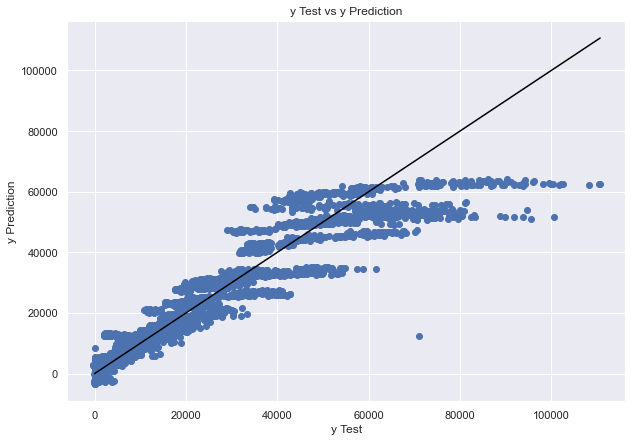

Wall time: 673 ms


In [63]:
%%time
ridgereg = Ridge(random_state=42)
print('Ridge Regression - alpha=1 - Store Type 0')
ridgereg, summary = modeling(ridgereg, X_train0, y_train0, X_test0, y_test0)

This performed significantly better. Let's do GridSearchCV to tune alpha.

In [64]:
# Import module
from sklearn.model_selection import GridSearchCV

Ridge Regression - GridSearchCV alpha - Store Type 0
Best parameters: {'alpha': 0.1}
R2 training score = 0.9016
R2 testing score = 0.9218
Root-mean-squared test score 4585.0


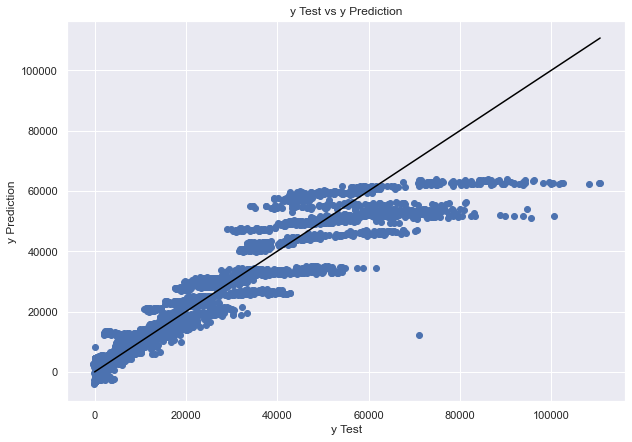

Wall time: 4.65 s


In [67]:
%%time
ridgereg = Ridge(random_state=42)
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
ridgeGS = GridSearchCV(ridgereg, param_grid)
print('Ridge Regression - GridSearchCV alpha - Store Type 0')
ridgeGS, summary = modeling(ridgeGS, X_train0, y_train0, X_test0, y_test0)

Let's see how it does on Type 1 and Type 2 stores

Ridge Regression - GridSearchCV alpha - Store Type 1
Best parameters: {'alpha': 1}
R2 training score = 0.6449
R2 testing score = 0.7262
Root-mean-squared test score 8285.0


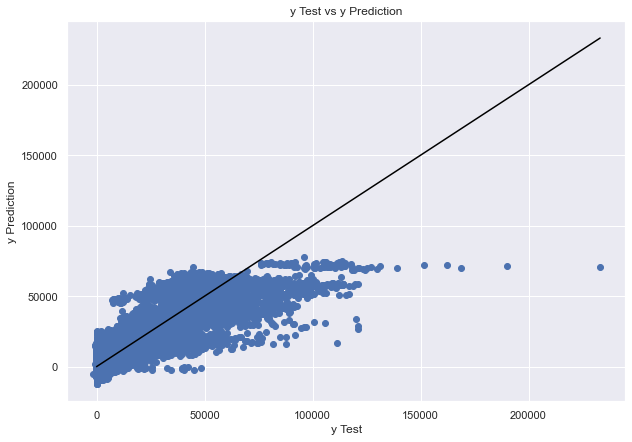

Wall time: 18.5 s


In [69]:
%%time
ridgereg = Ridge(random_state=42)
ridgeGS = GridSearchCV(ridgereg, param_grid)
print('Ridge Regression - GridSearchCV alpha - Store Type 1')
ridgeGS, summary = modeling(ridgeGS, X_train1, y_train1, X_test1, y_test1)

Ridge Regression - GridSearchCV alpha - Store Type 2
Best parameters: {'alpha': 1}
R2 training score = 0.7974
R2 testing score = 0.8355
Root-mean-squared test score 10575.0


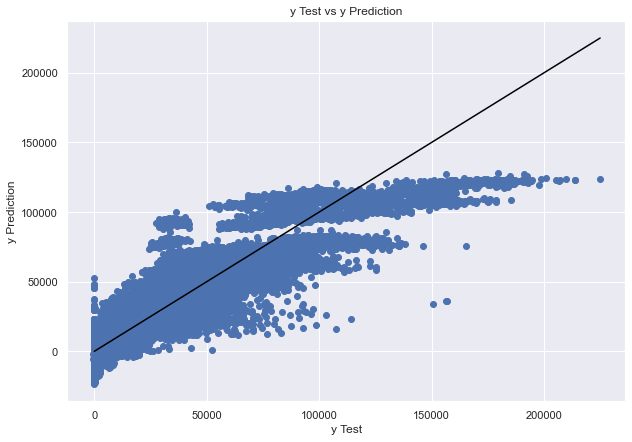

Wall time: 24.2 s


In [70]:
%%time
ridgereg = Ridge(random_state=42)
ridgeGS = GridSearchCV(ridgereg, param_grid)
print('Ridge Regression - GridSearchCV alpha - Store Type 2')
ridgeGS, summary = modeling(ridgeGS, X_train2, y_train2, X_test2, y_test2)

###### Let's try a Random Forest Regression to see if it does any better

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
# Define elbow plot function to determine appropriate parameters to use

def rfdepthelbow(valmin, valmax, X_train, y_train, X_test, y_test):

    ndepth = []
    nrmse = []

    for i in range(valmin+1, valmax+1):
        reg = RandomForestRegressor(max_depth=i, random_state=42, n_jobs=-1)
        reg.fit(X_train, np.ravel(y_train))
        y_pred = reg.predict(X_test)
        nrmse.append(mean_squared_error(y_test, y_pred, squared=False))
        ndepth.append(i)
        
    RFElbow = pd.DataFrame({'Max Depth':ndepth, 'Root-Mean-Squared Error':nrmse})
    fig = plt.figure(figsize=(15,7))
    _ = sns.lineplot(x='Max Depth', y='Root-Mean-Squared Error', data=RFElbow)
    _ = plt.title('Max Depth Elbow Plot')

Wall time: 3min 56s


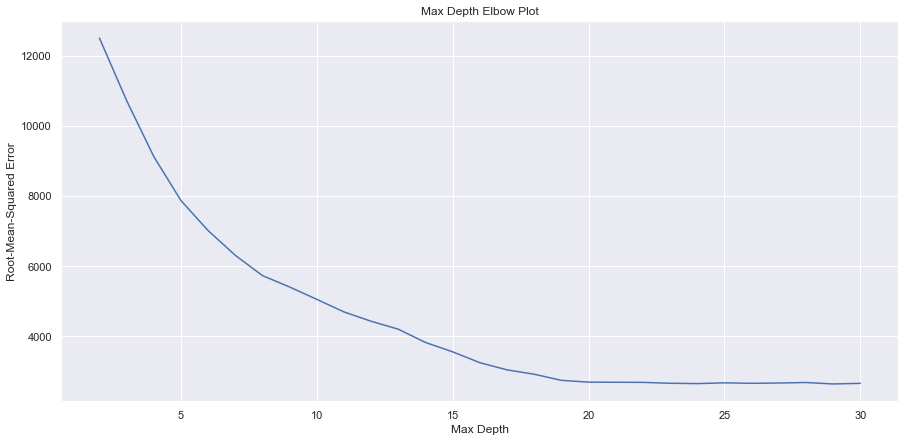

In [51]:
%%time
rfdepthelbow(2, 30, X_train0, y_train0, X_test0, y_test0)

It looks like 19 is a good max depth for Random Forest Regression

Random Forest - max_depth=19 - Store Type 0
R2 training score = 0.9868
R2 testing score = 0.9719
Root-mean-squared test score 2747.0


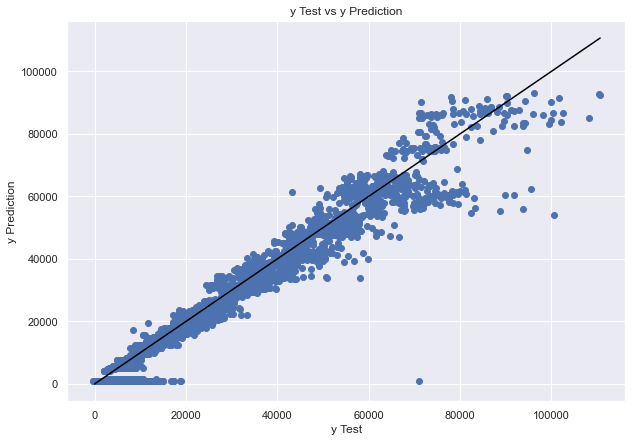

Wall time: 10.1 s


In [73]:
%%time
RFreg = RandomForestRegressor(max_depth=19, random_state=42, n_jobs=-1)
print('Random Forest - max_depth=19 - Store Type 0')
RFreg0, summary = modeling(RFreg, X_train0, np.ravel(y_train0), X_test0, np.ravel(y_test0))

Let's do the same operations for for df1

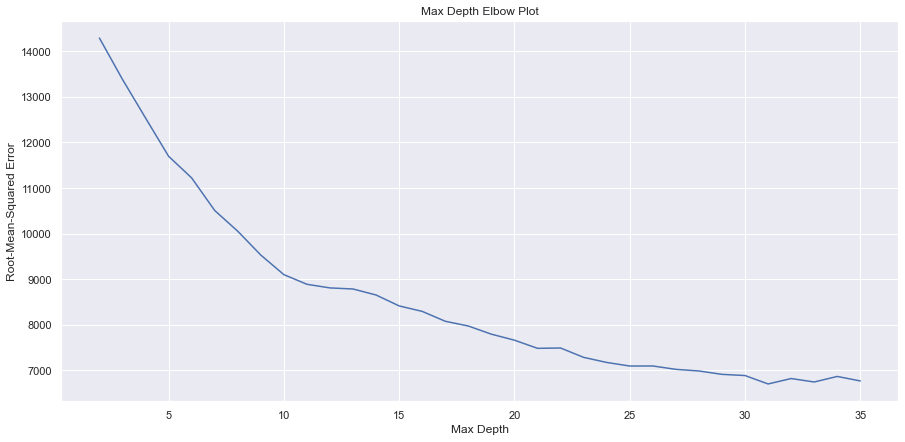

In [143]:
rfdepthelbow(19, X_train1, y_train1, X_test1, y_test1)

There's a bit of an elbow at 10, but bringing down to 30 levels it off at ~$2,000 less RMSE. Seemed to level off around 30. Let's try max_depth=10 and max_depth=30 and compare

Random Forest - max_depth=10 - Store Type 1
R2 training score = 0.7001
R2 testing score = 0.6697
Root-mean-squared test score 9101.0


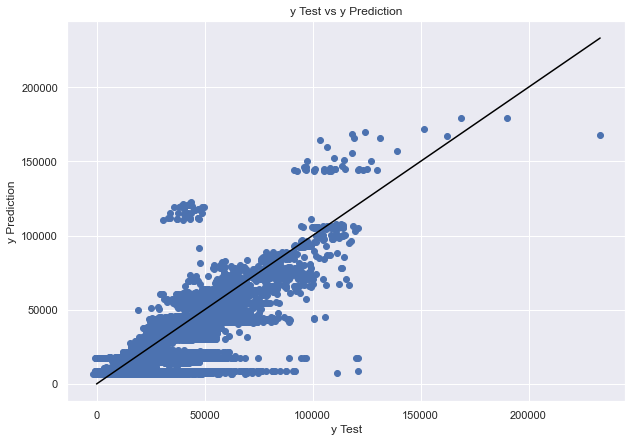

Wall time: 30.7 s


In [74]:
%%time
RFreg = RandomForestRegressor(max_depth=10, random_state=42, n_jobs=-1)
print('Random Forest - max_depth=10 - Store Type 1')
RFreg1, summary = modeling(RFreg, X_train1, np.ravel(y_train1), X_test1, np.ravel(y_test1))

Random Forest - max_depth=30 - Store Type 1
R2 training score = 0.9302
R2 testing score = 0.8136
Root-mean-squared test score 6836.0


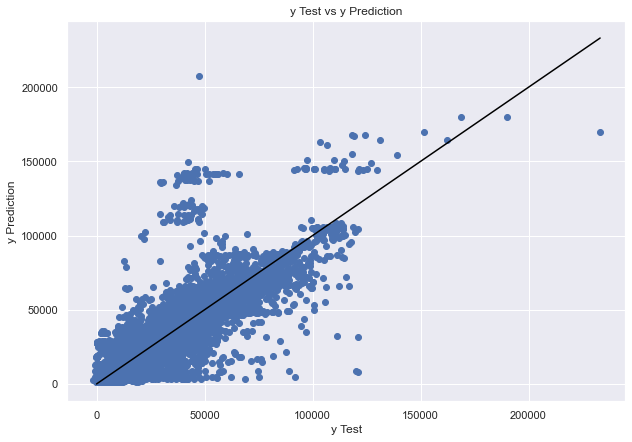

Wall time: 1min 12s


In [75]:
%%time
RFreg = RandomForestRegressor(max_depth=30, random_state=42, n_jobs=-1)
print('Random Forest - max_depth=30 - Store Type 1')
RFreg1, summary = modeling(RFreg, X_train1, np.ravel(y_train1), X_test1, np.ravel(y_test1))

Decent improvement from 10 to 30 for Store 1

Try it out on Store 2

Random Forest - max_depth=10 - Store Type 2
R2 training score = 0.7294
R2 testing score = 0.7535
Root-mean-squared test score 12944.0


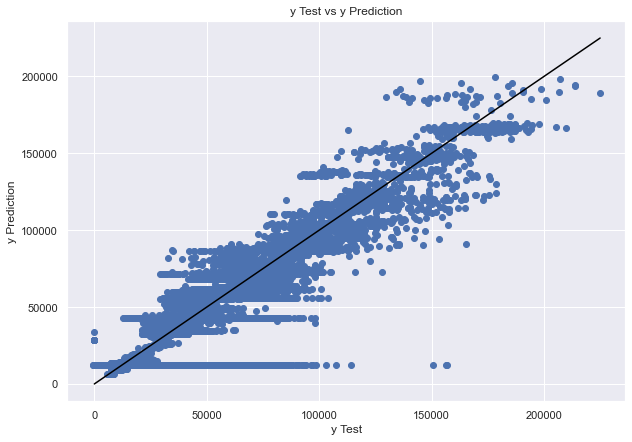

Wall time: 47.1 s


In [76]:
%%time
RFreg = RandomForestRegressor(max_depth=10, random_state=42, n_jobs=-1)
print('Random Forest - max_depth=10 - Store Type 2')
RFreg2, summary = modeling(RFreg, X_train2, np.ravel(y_train2), X_test2, np.ravel(y_test2))

Random Forest - max_depth=20 - Store Type 2
R2 training score = 0.8855
R2 testing score = 0.8663
Root-mean-squared test score 9534.0


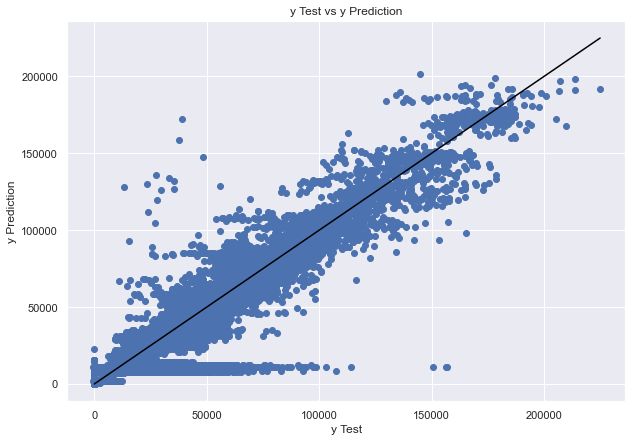

Wall time: 1min 18s


In [77]:
%%time
RFreg = RandomForestRegressor(max_depth=20, random_state=42, n_jobs=-1)
print('Random Forest - max_depth=20 - Store Type 2')
RFreg2, summary = modeling(RFreg, X_train2, np.ravel(y_train2), X_test2, np.ravel(y_test2))

Random Forest - max_depth=30 - Store Type 2
R2 training score = 0.9416
R2 testing score = 0.9089
Root-mean-squared test score 7870.0


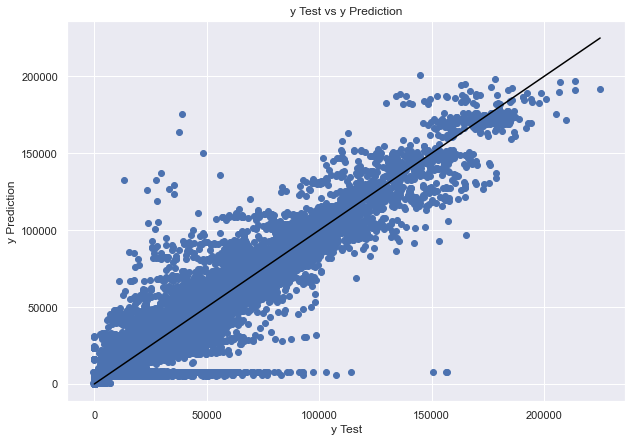

Wall time: 1min 42s


In [78]:
%%time
RFreg = RandomForestRegressor(max_depth=30, random_state=42, n_jobs=-1)
print('Random Forest - max_depth=30 - Store Type 2')
RFreg2, summary = modeling(RFreg, X_train2, np.ravel(y_train2), X_test2, np.ravel(y_test2))

##### Let's try applying cluster features to the data and see if that helps segment it a bit more

In [82]:
from sklearn.cluster import KMeans

In [83]:
def knnelbow(valmin, valmax, X_train):

    nclusters = []
    kinertia = []

    for i in range(valmin+1, valmax+1):
        kmean = KMeans(n_clusters=i, random_state=42)
        kmean.fit(X_train)
        inertia = kmean.inertia_
        kinertia.append(inertia)
        nclusters.append(i)
        
    KMelbow = pd.DataFrame({'N Clusters':nclusters, 'Inertia':kinertia})
    fig = plt.figure(figsize=(15,7))
    _ = sns.lineplot(x='N Clusters', y='Inertia', data=KMelbow)
    _ = plt.title('N Clusters K Means Elbow Plot')

Wall time: 26min 50s


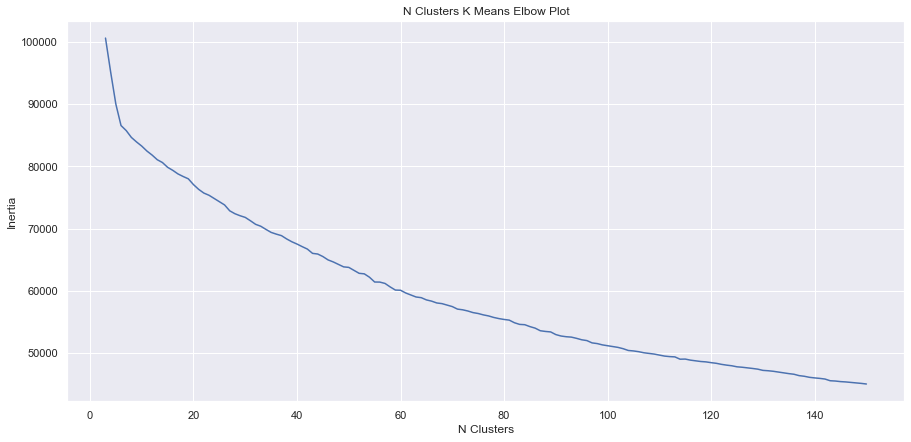

In [86]:
%%time
knnelbow(2, 150, X_train0)

Let's try clusterint with n=5, 10, 15, 20, 40, 60, 80, 100, and 120

In [88]:
def clustermodeling(clusters, depth, X_train, y_train, X_test, y_test):
    kmn = KMeans(n_clusters=clusters, random_state=42)
    kmn.fit(X_train)
    kmntrain = kmn.labels_
    kmntest = kmn.predict(X_test)
    X_train['cluster'] = kmntrain
    clusterDumTrain = pd.get_dummies(X_train['cluster'], prefix='Cluster', drop_first=True)
    X_train = X_train.join(clusterDumTrain)
    X_test['cluster'] = kmntest
    clusterDumTest = pd.get_dummies(X_test['cluster'], prefix='Cluster', drop_first=True)
    X_test = X_test.join(clusterDumTest)
    setdif = np.setdiff1d(X_train.cluster.unique(), X_test.cluster.unique())
    for i in setdif:
        X_test['cluster_' + str(i)] = np.zeros(shape=(X_test.shape[0], 1))    
    X_train = X_train.drop(columns='cluster')
    X_test = X_test.drop(columns='cluster')
    RFreg = RandomForestRegressor(max_depth=depth, random_state=42, n_jobs=-1)
    modeling(RFreg, X_train, np.ravel(y_train), X_test, np.ravel(y_test))

RF on Type 0 stores performed well without clustering. Let's see if we can improve type 1 stores.

R2 training score = 0.9302
R2 testing score = 0.8131
Root-mean-squared test score 6845.0


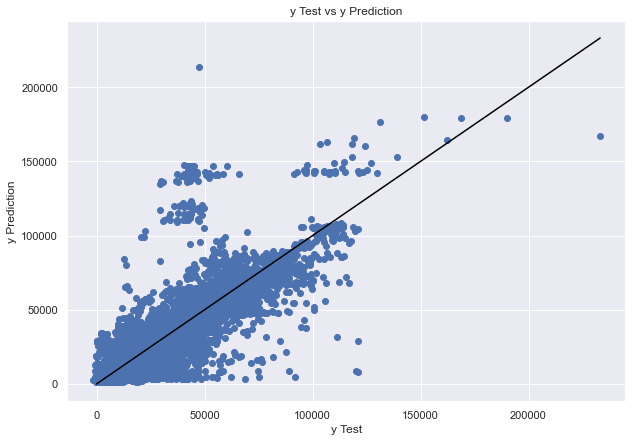

Wall time: 1min 29s


In [95]:
%%time
clustermodeling(5, 30, X_train1, y_train1, X_test1, y_test1)

R2 training score = 0.9303
R2 testing score = 0.8158
Root-mean-squared test score 6797.0


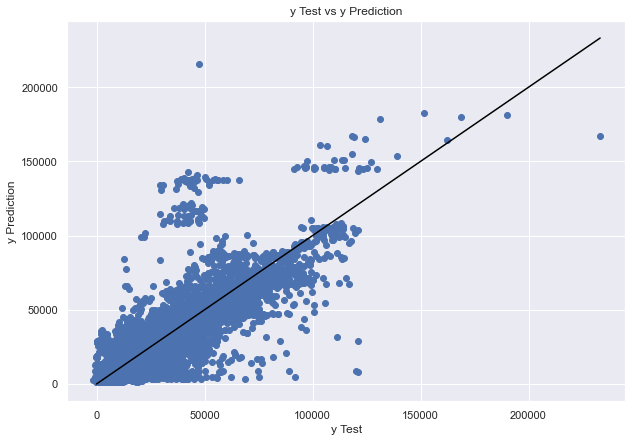

Wall time: 1min 22s


In [96]:
%%time
clustermodeling(10, 30, X_train1, y_train1, X_test1, y_test1)

R2 training score = 0.9303
R2 testing score = 0.8118
Root-mean-squared test score 6869.0


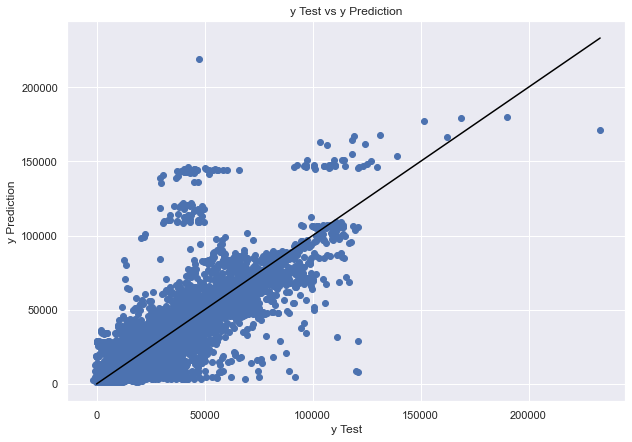

Wall time: 1min 26s


In [97]:
%%time
clustermodeling(15, 30, X_train1, y_train1, X_test1, y_test1)

R2 training score = 0.9303
R2 testing score = 0.8142
Root-mean-squared test score 6826.0


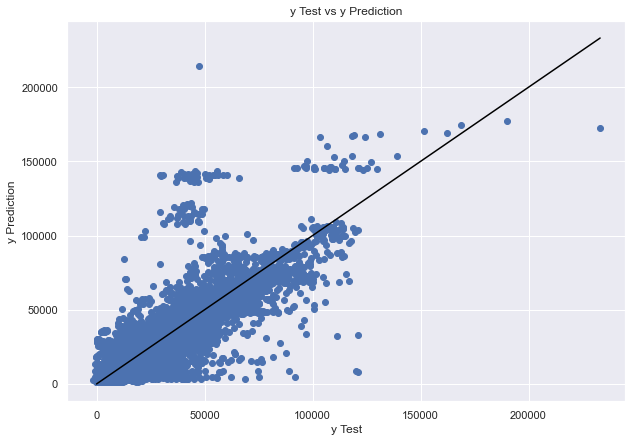

Wall time: 1min 35s


In [89]:
%%time
clustermodeling(20, 30, X_train1, y_train1, X_test1, y_test1)

R2 training score = 0.9303
R2 testing score = 0.7093
Root-mean-squared test score 8537.0


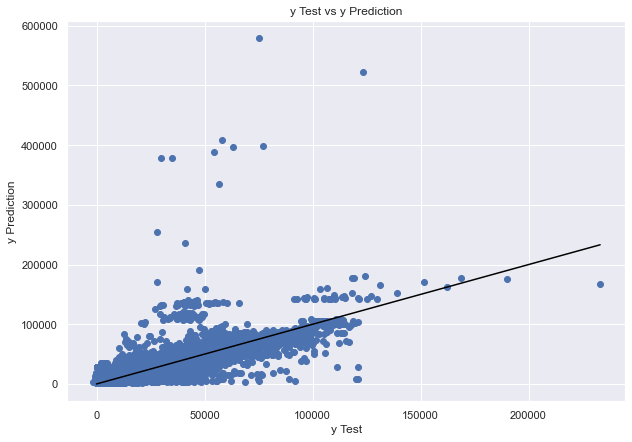

Wall time: 1min 47s


In [90]:
%%time
clustermodeling(40, 30, X_train1, y_train1, X_test1, y_test1)

R2 training score = 0.9302
R2 testing score = 0.6434
Root-mean-squared test score 9456.0


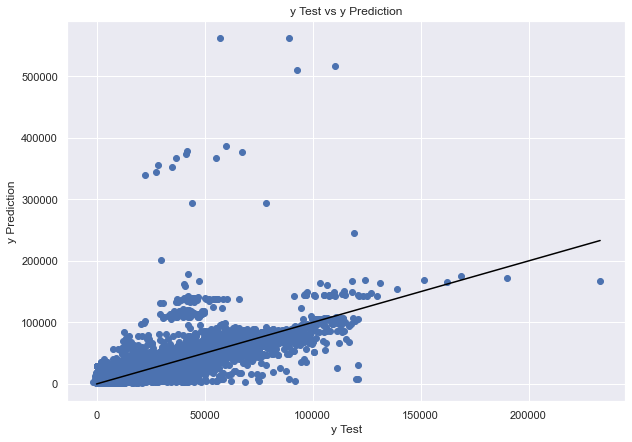

Wall time: 2min 3s


In [91]:
%%time
clustermodeling(60, 30, X_train1, y_train1, X_test1, y_test1)

R2 training score = 0.9302
R2 testing score = 0.7114
Root-mean-squared test score 8507.0


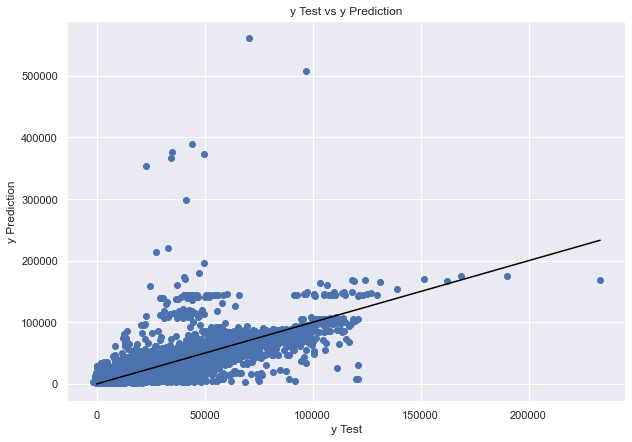

Wall time: 2min 18s


In [92]:
%%time
clustermodeling(80, 30, X_train1, y_train1, X_test1, y_test1)

R2 training score = 0.9302
R2 testing score = 0.8052
Root-mean-squared test score 6990.0


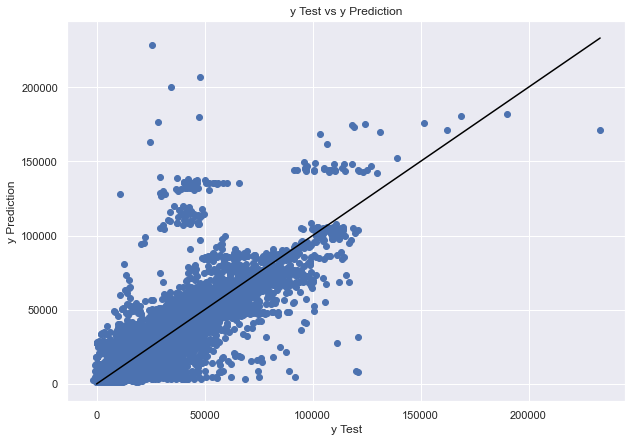

Wall time: 2min 37s


In [93]:
%%time
clustermodeling(100, 30, X_train1, y_train1, X_test1, y_test1)

R2 training score = 0.9301
R2 testing score = 0.8194
Root-mean-squared test score 6729.0


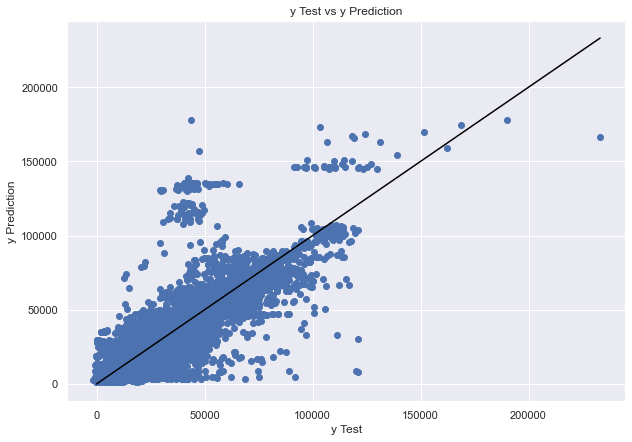

Wall time: 2min 52s


In [98]:
%%time
clustermodeling(120, 30, X_train1, y_train1, X_test1, y_test1)

In [99]:
notify.send('Finished clustering trials - 2')

R2 training score = 0.9868
R2 testing score = 0.9719
Root-mean-squared test score 2749.0


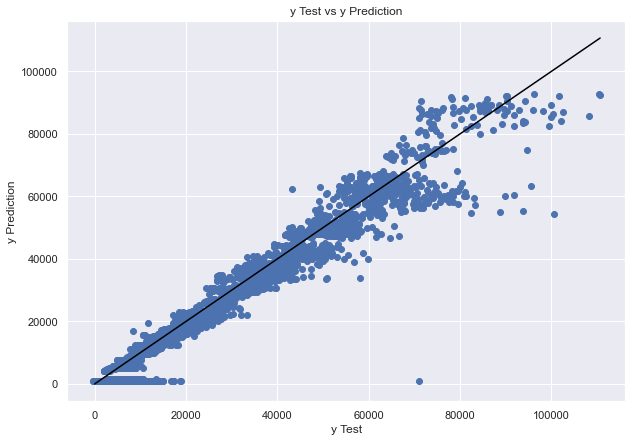

Wall time: 13.7 s


In [160]:
%%time
clustermodeling(20, 19, X_train0, y_train0, X_test0, y_test0)

R2 training score = 0.9302
R2 testing score = 0.8138
Root-mean-squared test score 6834.0


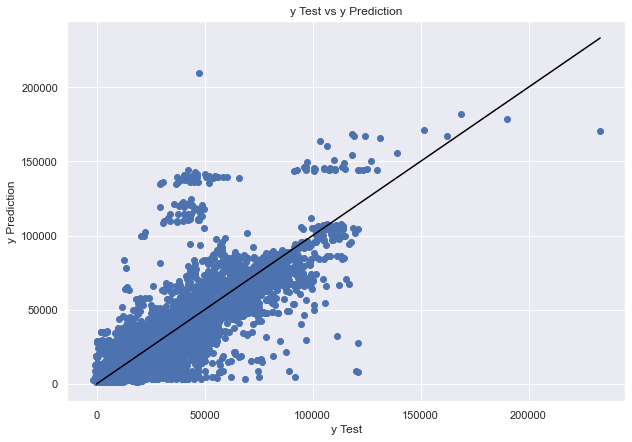

Wall time: 1min 16s


In [161]:
%%time
clustermodeling(5, 30, X_train1, y_train1, X_test1, y_test1)

R2 training score = 0.9305
R2 testing score = 0.8171
Root-mean-squared test score 6773.0


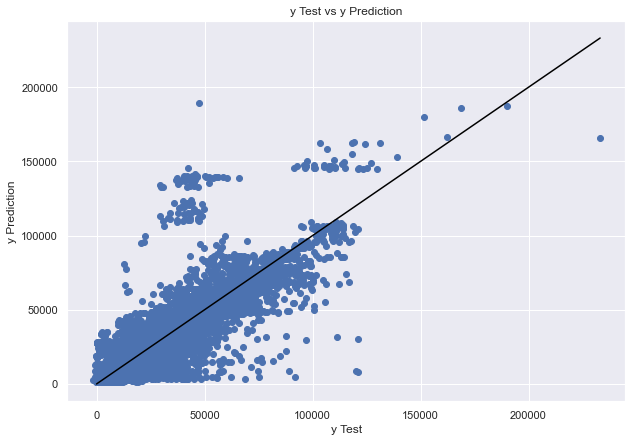

Wall time: 1min 31s


In [162]:
%%time
clustermodeling(20, 30, X_train1, y_train1, X_test1, y_test1)

R2 training score = 0.9416
R2 testing score = 0.9085
Root-mean-squared test score 7886.0


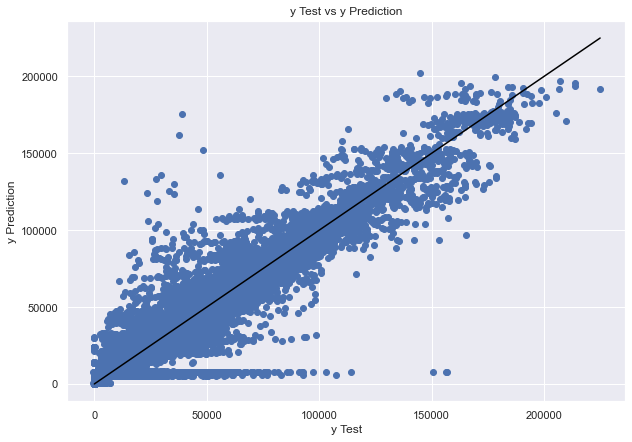

Wall time: 1min 53s


In [163]:
%%time
clustermodeling(5, 30, X_train2, y_train2, X_test2, y_test2)

R2 training score = 0.9417
R2 testing score = 0.9027
Root-mean-squared test score 8131.0


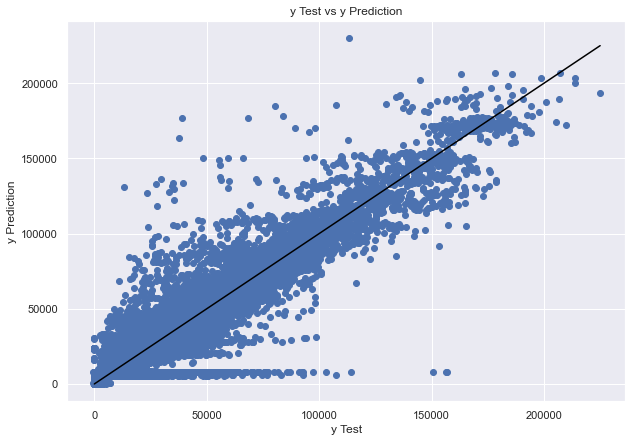

Wall time: 2min 14s


In [164]:
%%time
clustermodeling(20, 30, X_train2, y_train2, X_test2, y_test2)

Clustering didn't really do much to help the model

#### Let's build a function to log metrics for evaluation of each department at each store

In [36]:
type0Stores = [col for col in X_test0.columns if 'Store' in col]
type0Depts = [col for col in X_test0.columns if 'Dept' in col]
type1Stores = [col for col in X_test1.columns if 'Store' in col]
type1Depts = [col for col in X_test1.columns if 'Dept' in col]
type2Stores = [col for col in X_test2.columns if 'Store' in col]
type2Depts = [col for col in X_test2.columns if 'Dept' in col]

In [37]:
from sklearn.metrics import mean_absolute_error

In [38]:
def storedepttest(store, dept, reg, X_test, y_test):
    smask = X_test[store] == 1
    dmask = X_test[dept] == 1

    SDX_test = X_test.loc[smask].loc[dmask]
    SDX_testIDX = SDX_test.index

    SDy_test = y_test.loc[SDX_testIDX]

    SDy_pred = reg.predict(SDX_test)
    
    return [mean_absolute_error(SDy_test, SDy_pred), mean_squared_error(SDy_test, SDy_pred, squared=False)]

In [39]:
def storedepttestagg(typestores, typedepts, reg, X_train, y_train, X_test, y_test):
    
    stores = []
    depts = []
    MAEs = []
    RMSEs = []
    
    reg = reg.fit(X_train, y_train)
    
    for i in typestores:
            for k in typedepts:
                try:
                    l, m = storedepttest(i, k, reg, X_test, y_test)
                    MAEs.append(l)
                    RMSEs.append(m)
                    stores.append(i)
                    depts.append(k)
                except:
                    pass
    results = [stores, depts, MAEs, RMSEs]
    results = pd.DataFrame(results, index=['Store', 'Dept', 'MAE', 'RMSE']).transpose().astype({'MAE': 'float64', 'RMSE': 'float64'})
    return results

In [205]:
%%time
RFreg0 = RandomForestRegressor(max_depth=19, random_state=42, n_jobs=-1)
Type0Results = storedepttestagg(type0Stores, type0Depts, RFreg0, X_train0, y_train0, X_test0, y_test0)
Type0Results.describe()

Wall time: 44.6 s


,MAE,RMSE
count,296.000000,296.000000
mean,1313.799161,1484.731030
std,1553.770455,1869.747983
min,101.062249,128.653016
25%,682.633327,763.227128
50%,928.612159,939.382302
75%,1046.704208,1269.522813
max,15921.258821,18934.681327


In [206]:
%%time
RFreg1 = RandomForestRegressor(max_depth=30, random_state=42, n_jobs=-1)
Type1Results = storedepttestagg(type1Stores, type1Depts, RFreg1, X_train1, y_train1, X_test1, y_test1)
Type1Results.describe()

Wall time: 3min 25s


,MAE,RMSE
count,1151.000000,1151.000000
mean,3798.675543,4367.096026
std,4443.235862,4895.150591
min,144.842219,179.492383
25%,1728.062336,1964.343911
50%,2935.255322,3300.661407
75%,4551.835206,4863.004275
max,97374.387795,98346.677964


In [207]:
%%time
RFreg2 = RandomForestRegressor(max_depth=30, random_state=42, n_jobs=-1)
Type2Results = storedepttestagg(type2Stores, type2Depts, RFreg2, X_train2, y_train2, X_test2, y_test2)
Type2Results.describe()

Wall time: 4min 56s


,MAE,RMSE
count,1523.000000,1523.000000
mean,4983.872022,5686.291382
std,4437.762529,5001.807110
min,27.404766,35.605081
25%,2248.607457,2694.603473
50%,4154.030835,4704.593727
75%,6507.112303,7351.203498
max,49448.584574,53193.909956


In [208]:
notify.send('Complete')

#### Let's try reducing the dimensionality of these with PCA and then fitting

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA()
pca.fit(X_train1)

PCA()

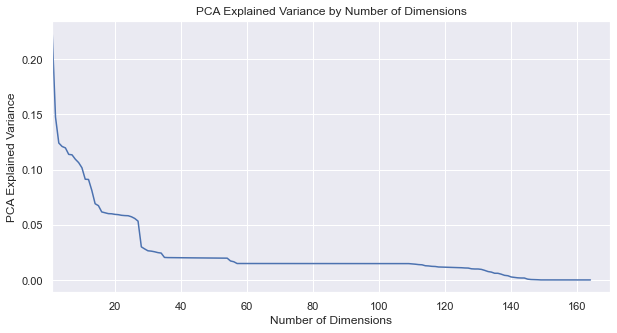

In [34]:
_ = plt.figure(figsize=(10,5))
_ = plt.plot(np.arange(pca.explained_variance_.shape[0])+1, pca.explained_variance_)
_ = plt.title('PCA Explained Variance by Number of Dimensions')
_ = plt.xlabel('Number of Dimensions')
_ = plt.ylabel('PCA Explained Variance')
_ = plt.xlim(1, 170)
_ = plt.show()
_ = plt.close()

It looks like we could set n_components=55

In [35]:
%%time
pca = PCA(n_components=55)
pcaX_train1 = pca.fit_transform(X_train1)
pcaX_test1 = pca.transform(X_test1)

Wall time: 2.5 s


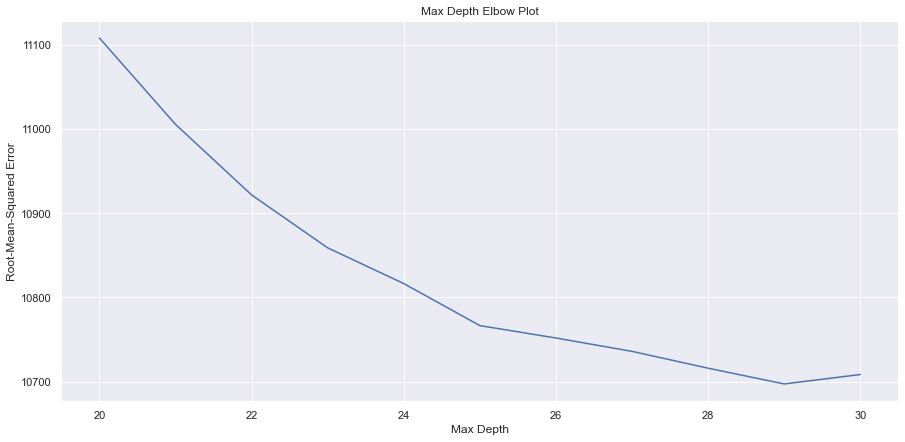

In [36]:
%%time
rfdepthelbow(19, 30, pcaX_train1, y_train1, pcaX_test1, y_test1)

Post-PCA Random Forest - n_components=55, max_depth=29 - Store Type 1
R2 training score = 0.9656
R2 testing score = 0.6361
Root-mean-squared test score 9552.0


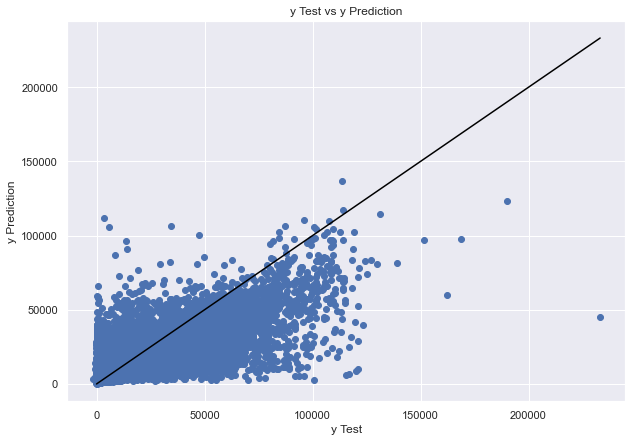

Wall time: 4min 2s


In [39]:
%%time
pca = PCA(n_components=55)
pcaX_train1 = pca.fit_transform(X_train1)
pcaX_test1 = pca.transform(X_test1)
RFreg = RandomForestRegressor(max_depth=29, random_state=42, n_jobs=-1)
print('Post-PCA Random Forest - n_components=55, max_depth=29 - Store Type 1')
modeling(RFreg, pcaX_train1, np.ravel(y_train1), pcaX_test1, np.ravel(y_test1))

Try n_components = 100

In [40]:
%%time
pca = PCA(n_components=100)
pcaX_train1 = pca.fit_transform(X_train1)
pcaX_test1 = pca.transform(X_test1)

Wall time: 4.07 s


Wall time: 1h 3min 46s


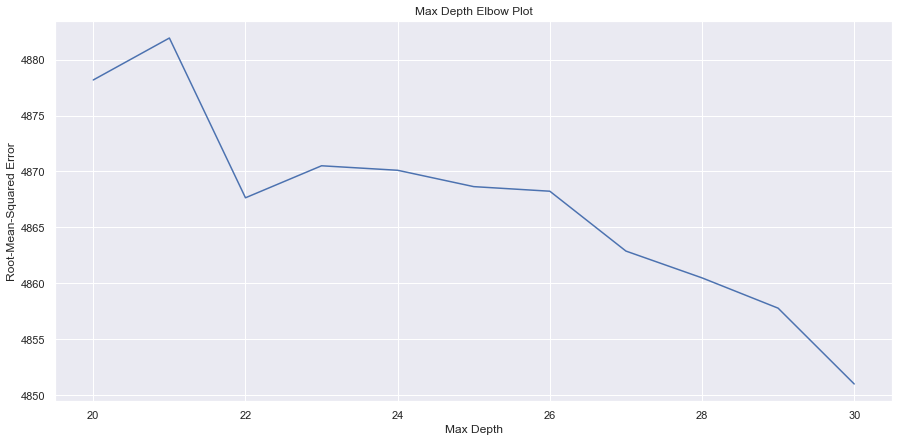

In [41]:
%%time
rfdepthelbow(19, 30, pcaX_train1, y_train1, pcaX_test1, y_test1)

Post-PCA Random Forest - max_depth=6 - Store Type 1
R2 training score = 0.9906
R2 testing score = 0.9083
Root-mean-squared test score 4795.0


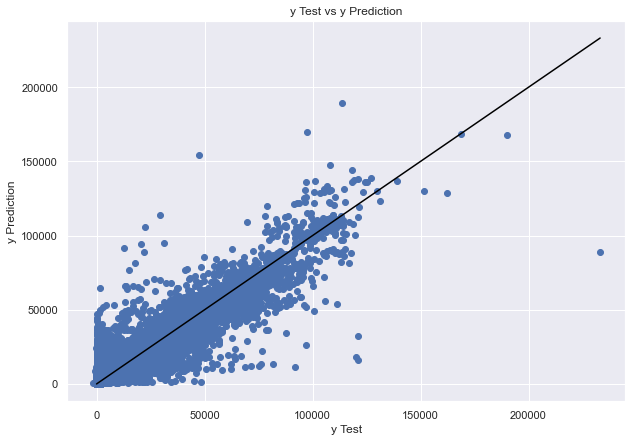

Wall time: 6min 13s


In [45]:
%%time
pca = PCA(n_components=100)
pcaX_train1 = pca.fit_transform(X_train1)
pcaX_test1 = pca.transform(X_test1)
RFreg = RandomForestRegressor(max_depth=30, random_state=42, n_jobs=-1)
print('Post-PCA Random Forest - max_depth=6 - Store Type 1')
modeling(RFreg, pcaX_train1, np.ravel(y_train1), pcaX_test1, np.ravel(y_test1))

In [46]:
notify.send('PCA n=100 RFReg Elbow Complete')